In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
data = pd.read_csv("../input/international_financial_statistics_data.csv", sep=",")

# Overview

In [2]:
data.dtypes

oid                 object
country_or_area     object
year                 int64
description         object
magnitude           object
value              float64
category            object
dtype: object

In [3]:
data.describe()

,year,value
count,884244.000000,8.842440e+05
mean,1988.040456,2.814864e+12
std,16.571348,6.497730e+13
min,1948.000000,-1.230640e+15
25%,1976.000000,2.830947e+00
50%,1992.000000,8.027500e+07
75%,2002.000000,9.002070e+09
max,2010.000000,2.104350e+16


# Data Cleaning

In [4]:
data.dropna(subset=['description','magnitude'], inplace=True)

# Europe Study

In [5]:
europe_list_some = ['BELGIUM'
                    ,'AUSTRIA'
                    ,'DENMARK'
                    ,'SWEDEN'
                    ,'FINLAND'
                    ,'CZECHOSLOVAKIA'
                    ,'SPAIN'
                    ,'ITALY'
                    ,'FRANCE'
                    ,'PORTUGAL'
                    ,'UNITED KINGDOM'
                    ,'GERMANY'
                    ,'ROMANIA'
                    ,'GREECE'
                    ,'HUNGARY'
                    ,'POLAND'
                    ,'LUXEMBOURG'
                    ,'BULGARIA'
                    ,'CROATIA'
                    ,'CYPRUS'
                    ,'CZECH REPUBLIC'
                    ,'IRELAND'
                    ,'NETHERLANDS'
                    ,'SLOVENIA'
                    ,'LITHUANIA'
                    ,'MALTA'
                    ,'ESTONIA']

len(europe_list_some)

27

In [6]:
europe_data = data[data.country_or_area.isin(europe_list_some)]

In [7]:
# TOP 7 countries in europe by population
list_top_7_population_europe_data = \
europe_data[europe_data.description == 'POPULATION'] \
.groupby('country_or_area') \
.sum() \
.sort_values(by='value', ascending= False) \
.index[:7]

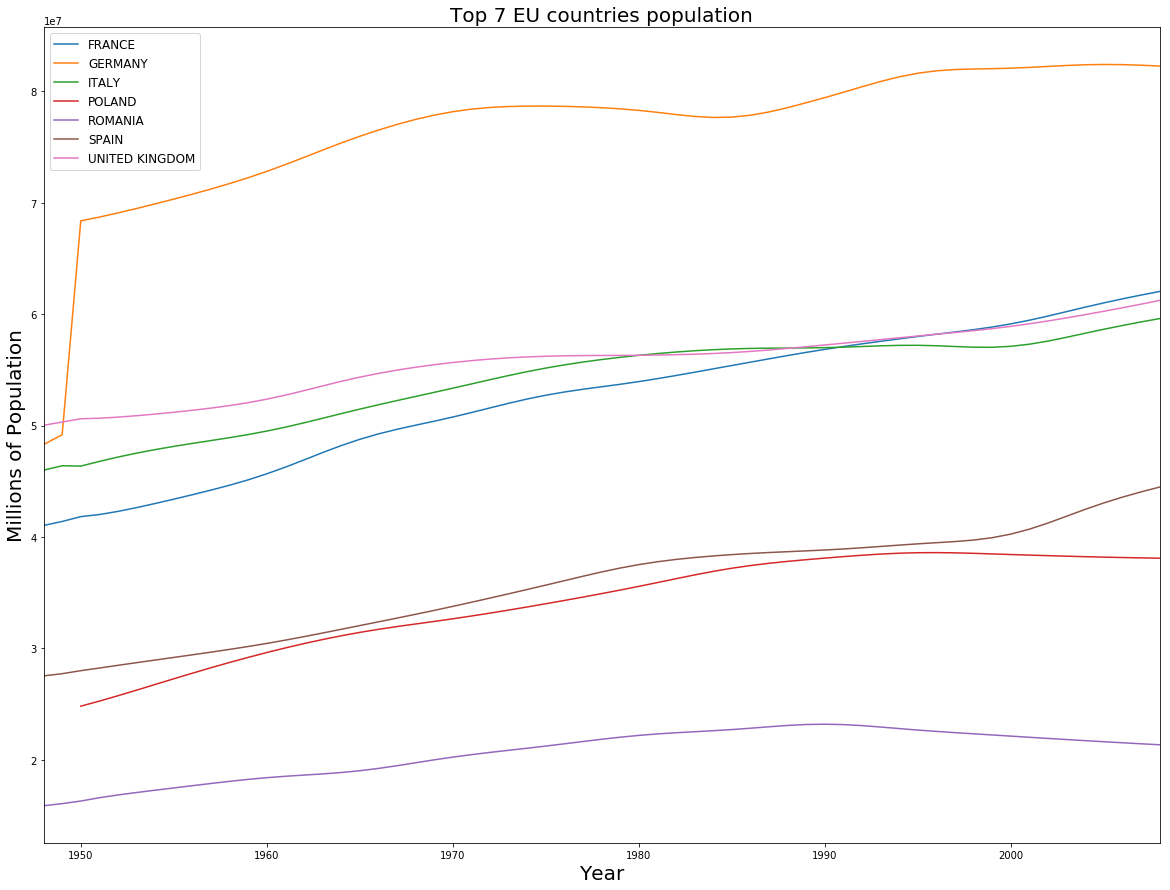

In [8]:
# Plotting top 7 countries by population
top_7__population_europe_data = data[data.country_or_area.isin(list_top_7_population_europe_data) 
                                     & (data.description == 'POPULATION')] 
y_europe_data = top_7__population_europe_data[['year','country_or_area','value']]
y_europe_data = y_europe_data.pivot(index='year', columns='country_or_area', values='value')
y_europe_data.plot(figsize=(20,15), logy=False)
plt.title('Top 7 EU countries population', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Millions of Population',  fontsize=20)
plt.legend(fontsize=12)
plt.show()